<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:black; margin:0; font-size:150%; font-family:Pacifico; background-color:pink; overflow:hidden"><b>🦋 Butterfly images classifications 🦋</b></div>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pathlib import Path
import warnings

# TensorFlow/Keras Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Embedding, LSTM
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import (
    EfficientNetB3, ResNet50, DenseNet121, MobileNetV2, VGG16
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Scikit-learn Libraries for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.preprocessing import LabelEncoder

# Suppress Warnings
warnings.filterwarnings("ignore")

print("All imports were successful!")

In [ ]:
print("GPU Available:", tf.test.is_gpu_available())

In [ ]:
#!pip uninstall tensorflow tensorflow-addons
#!pip install tensorflow==2.15.0
#!pip install tensorflow-addons
#!pip install vit-keras
#!pip install tensorflow vit-keras
#!pip uninstall tensorflow
#!pip install tensorflow==2.15.0 tensorflow-addons
#!pip install timm

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:green; overflow:hidden"><b>Load Dataset </b></div>

In [ ]:
# Load the butterfly dataset
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

In [ ]:
df_train.head()

In [ ]:
df_train.shape

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_train.isnull().sum()

# trin, test and split

In [ ]:
# Split the training dataset into training and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = '/kaggle/input/butterfly-image-classification/train'

In [ ]:
# Data augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datas.

In [ ]:
# Load training data with ImageDataGenerator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


# Data Visualization
- Here, we will show some visualizations from our data set. Let's look at some of our butterflies at this moment.
    - Default Bar Chart with Plasma Palette (Your Original)
    - Sorted Bar Chart (Ascending and Descending)
    - Horizontal Bar Chart
    - Bar Chart with Percentage Labels
    - Grouped Bar Chart (If Categories Exist)
    - Different Color Palettes for Visualization

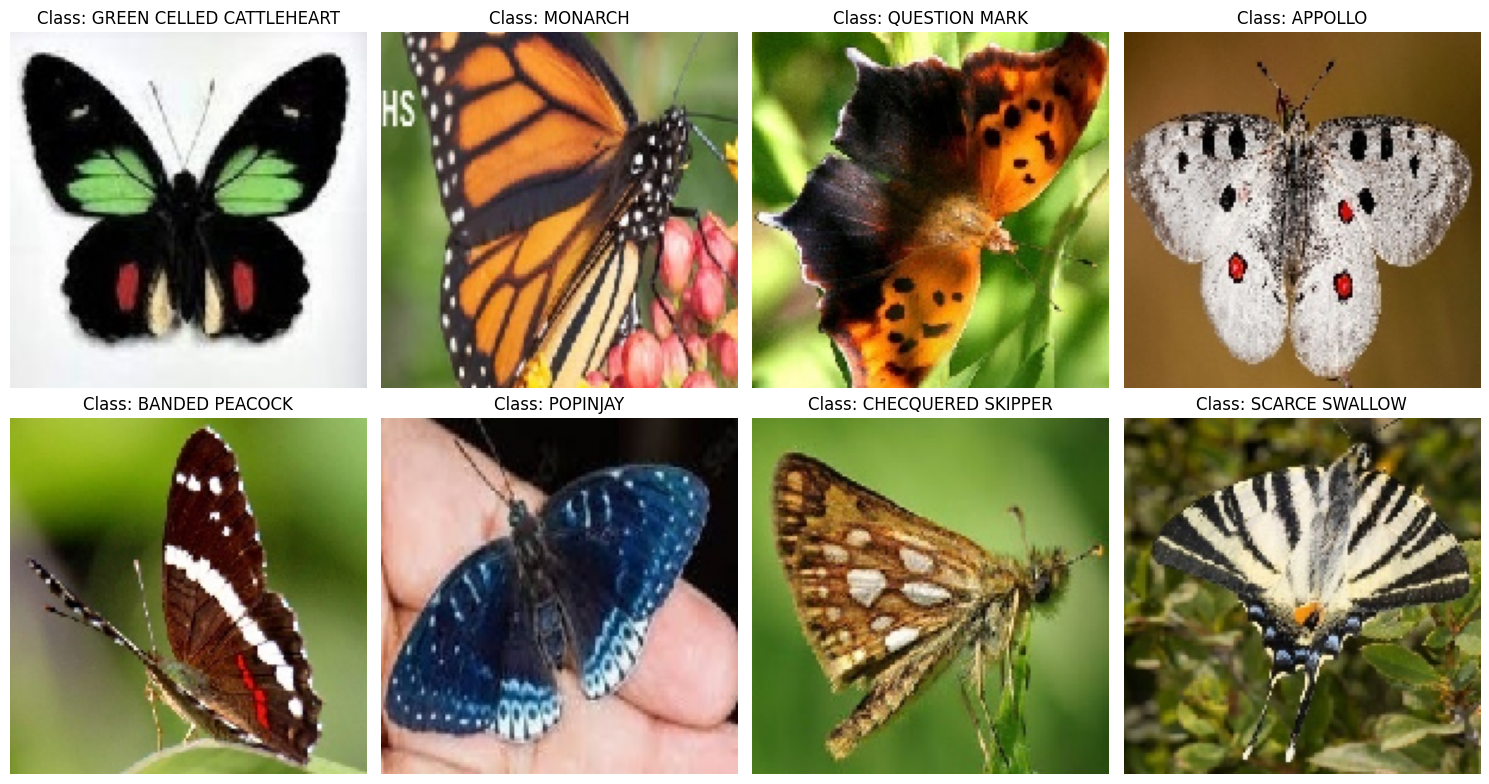

In [ ]:
# Create a grid for displaying butterflies
fig4, axes = plt.subplots(2, 4, figsize=(15, 8))

# Randomly sample
sample_images = df_train.sample(8, random_state=42)

# Display images
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_path = os.path.join(image_dir, row['filename'])
    image = load_img(image_path, target_size=(150, 150))
    image_array = img_to_array(image) / 255.0 # For normalization
    ax = axes[i // 4, i % 4]

    ax.imshow(image_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')  # Hide axes

# Show images
plt.tight_layout()
plt.show()

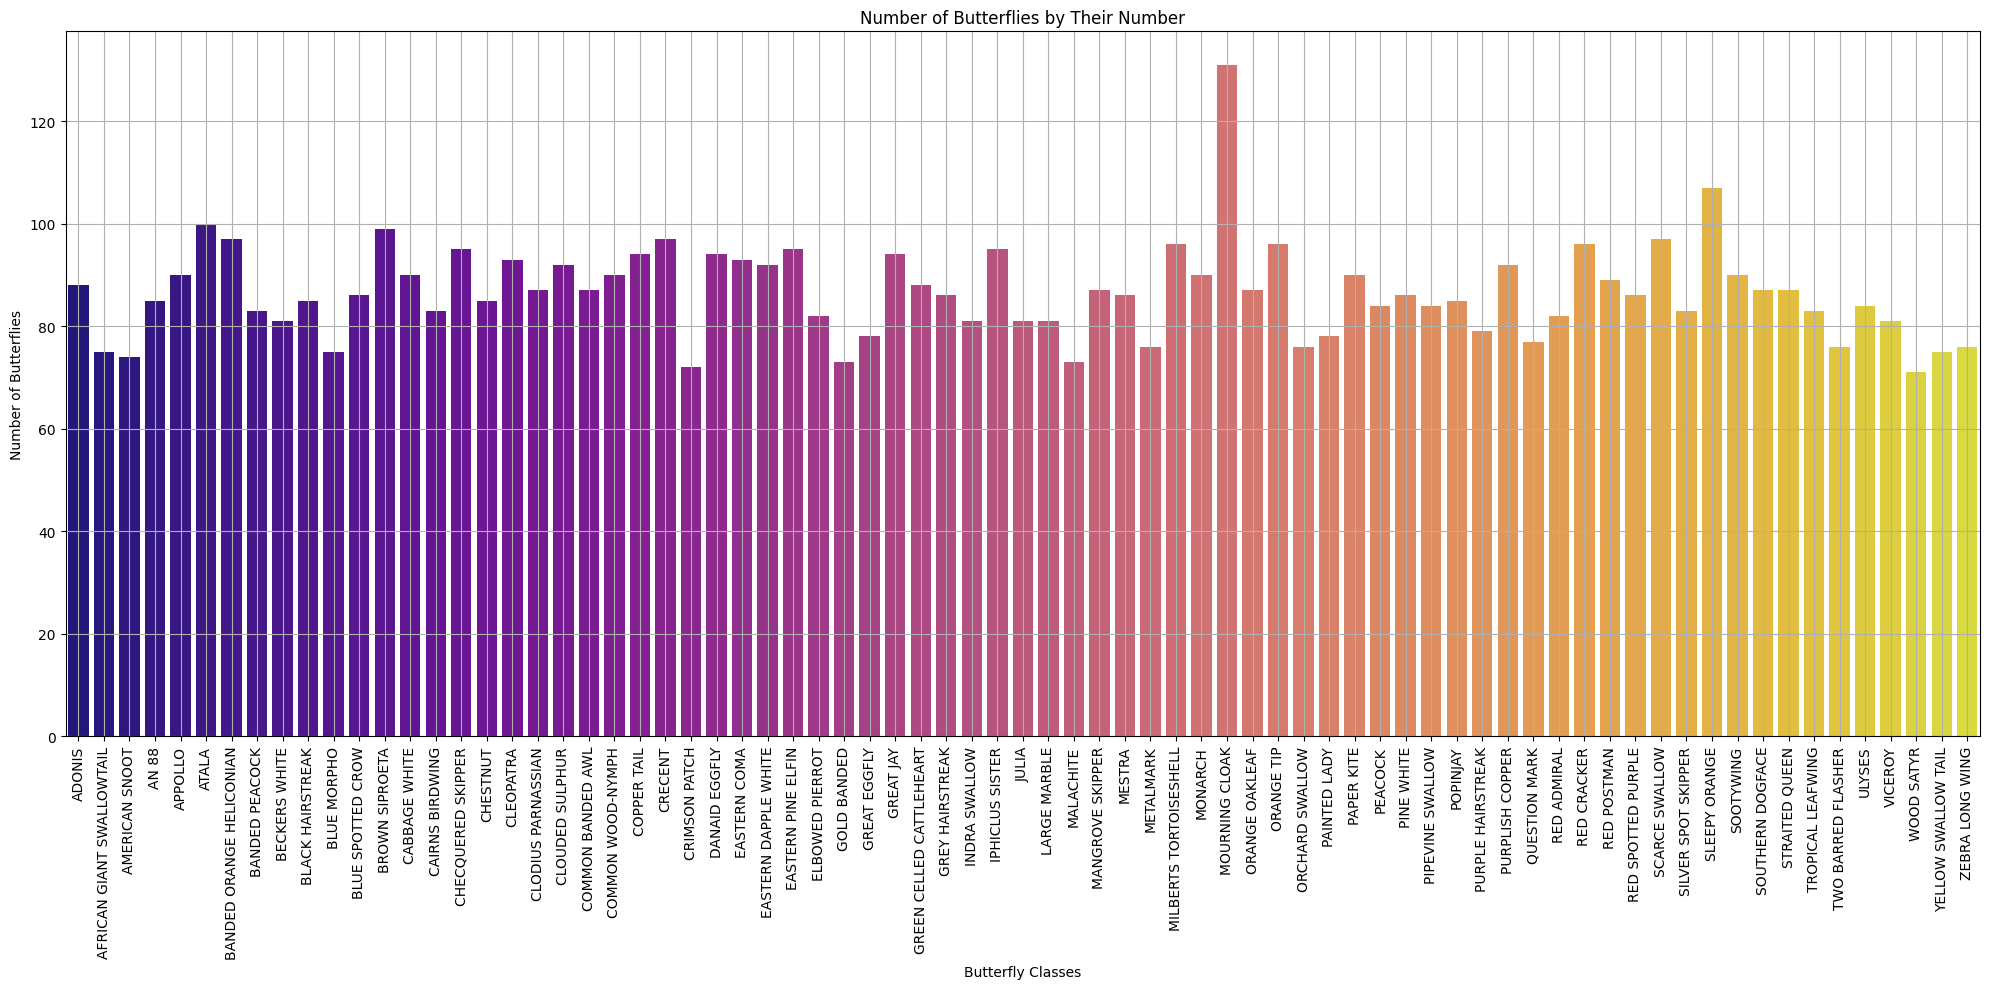

In [ ]:
# Create another table and visualize number of butterflies by their number
class_counts = df_train['label'].value_counts().sort_index()
fig1 = plt.figure(figsize=(20, 10))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='plasma')
plt.title('Number of Butterflies by Their Number')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Butterflies')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

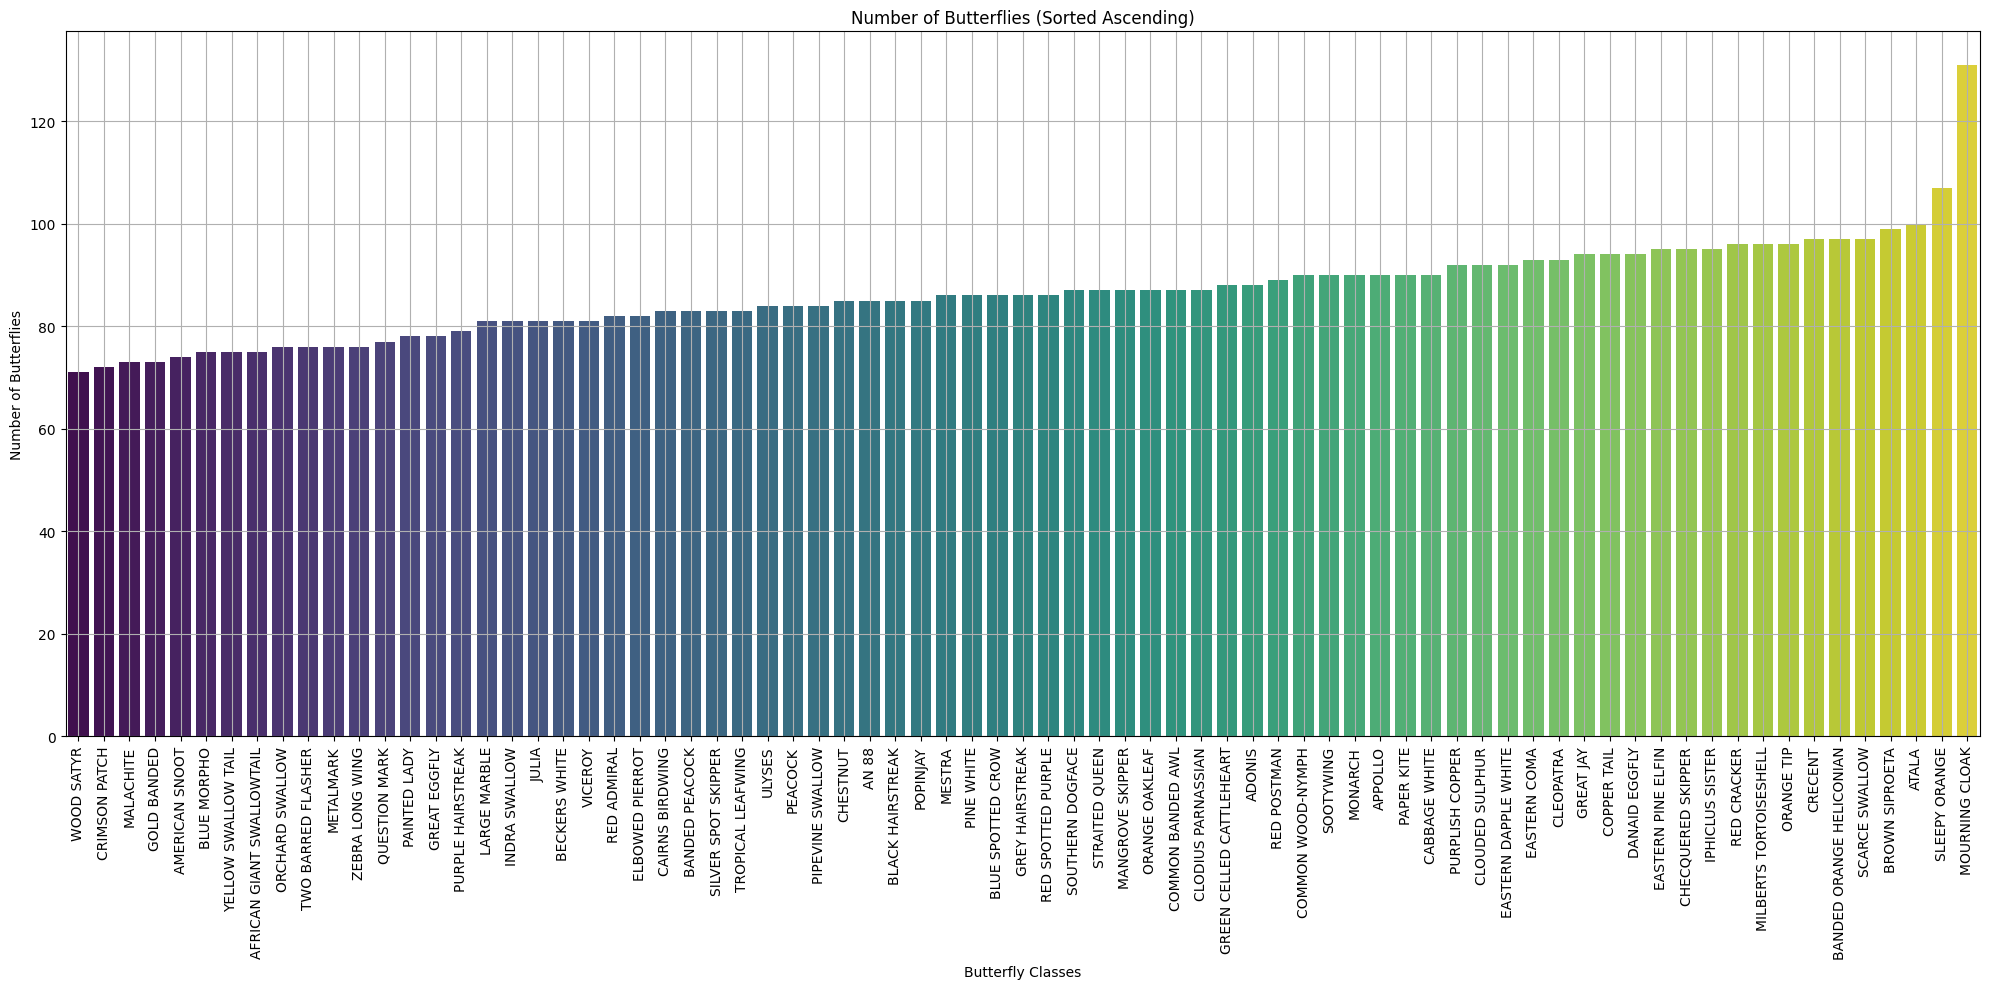

In [ ]:
# 2. Sorted Bar Chart (Ascending)
plt.figure(figsize=(20, 10))
sns.barplot(x=class_counts.sort_values().index, y=class_counts.sort_values().values, palette='viridis')
plt.title('Number of Butterflies (Sorted Ascending)')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Butterflies')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

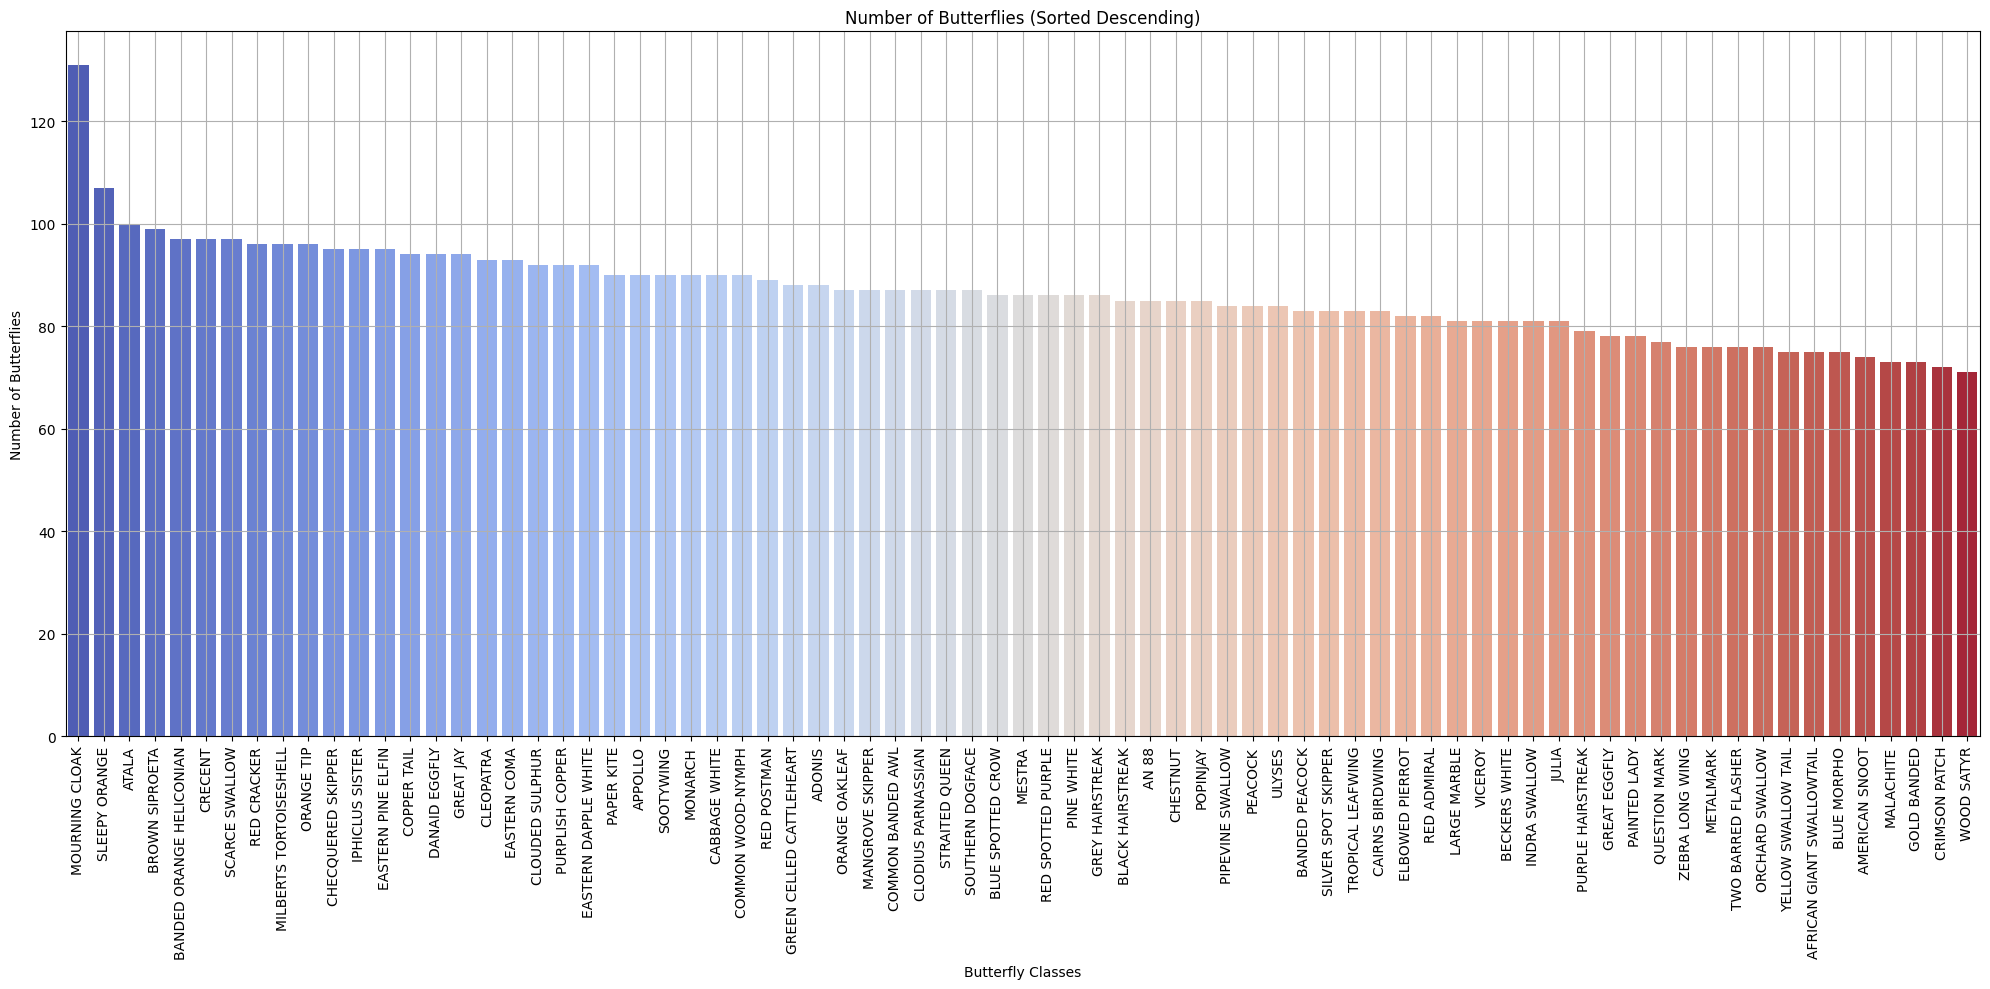

In [ ]:
# 3. Sorted Bar Chart (Descending)
plt.figure(figsize=(20, 10))
sns.barplot(x=class_counts.sort_values(ascending=False).index, y=class_counts.sort_values(ascending=False).values, palette='coolwarm')
plt.title('Number of Butterflies (Sorted Descending)')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Butterflies')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

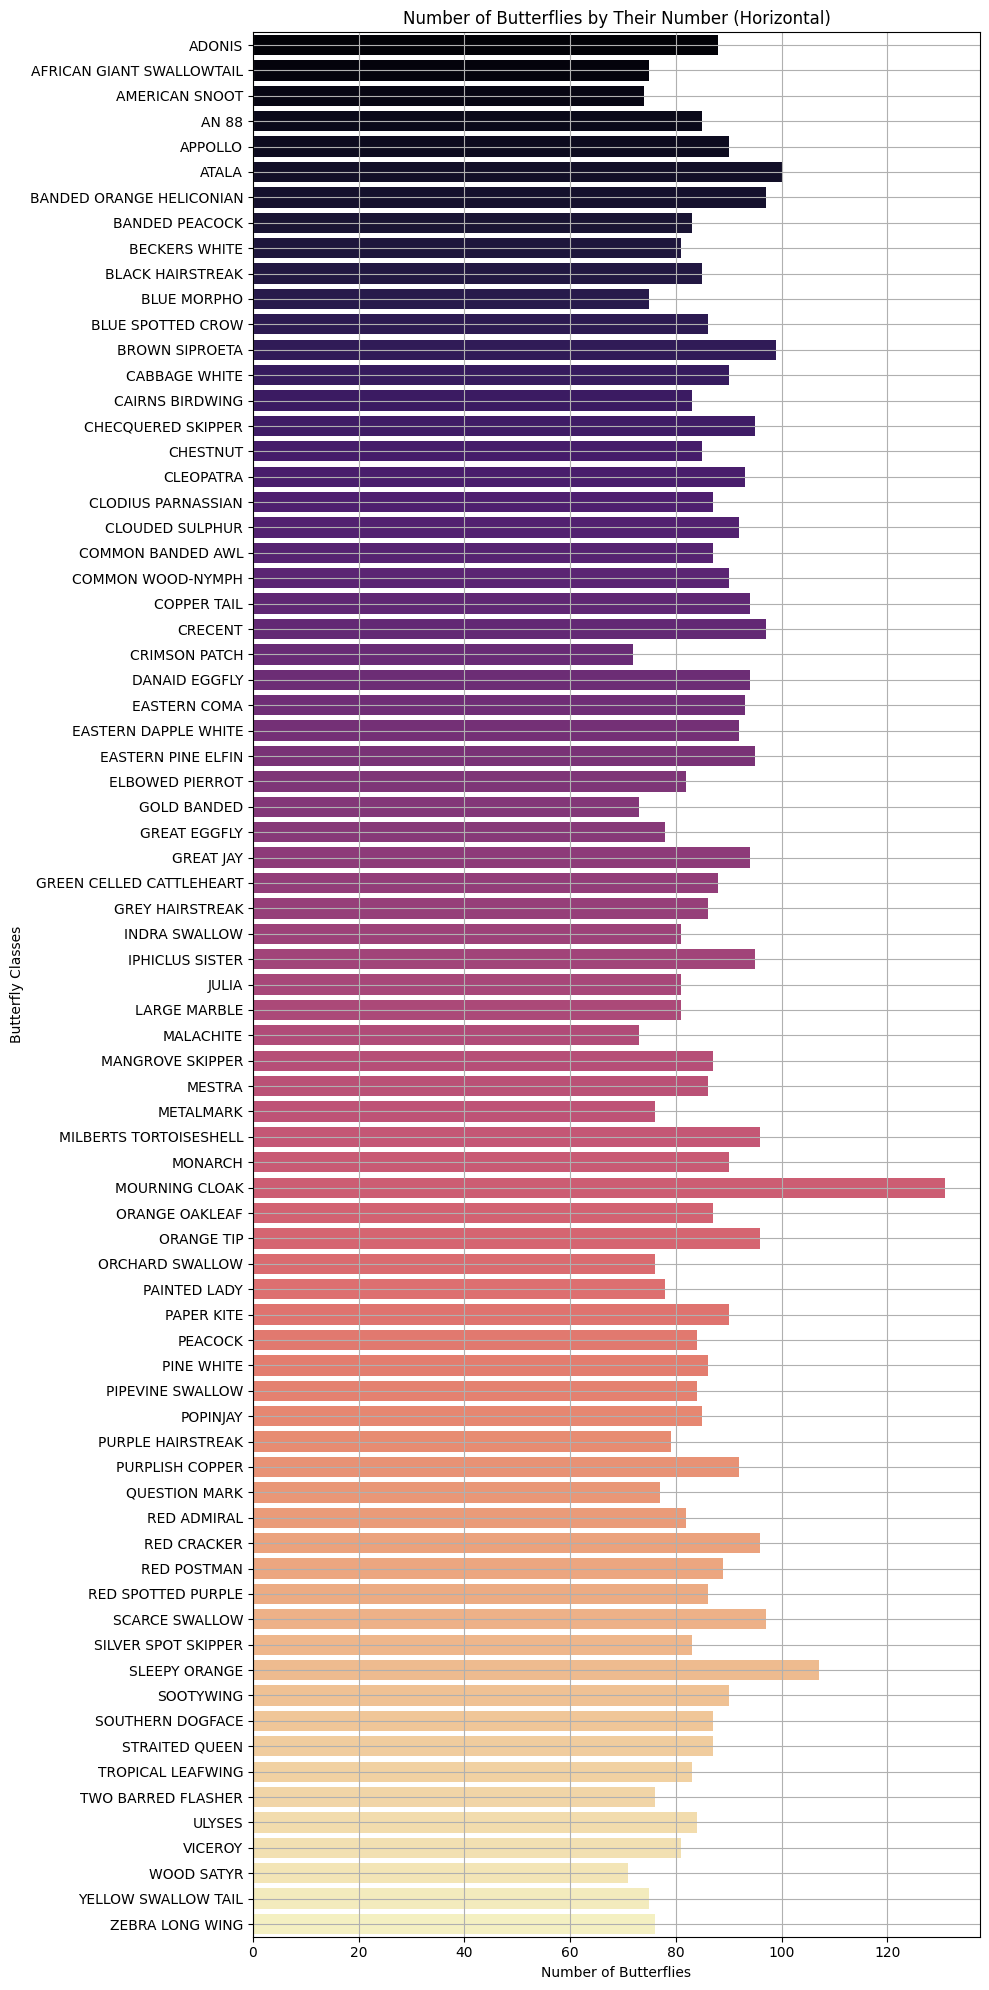

In [ ]:
# 4. Horizontal Bar Chart
plt.figure(figsize=(10, 20))
sns.barplot(y=class_counts.index, x=class_counts.values, palette='magma')
plt.title('Number of Butterflies by Their Number (Horizontal)')
plt.ylabel('Butterfly Classes')
plt.xlabel('Number of Butterflies')
plt.grid()
plt.tight_layout()
plt.show()

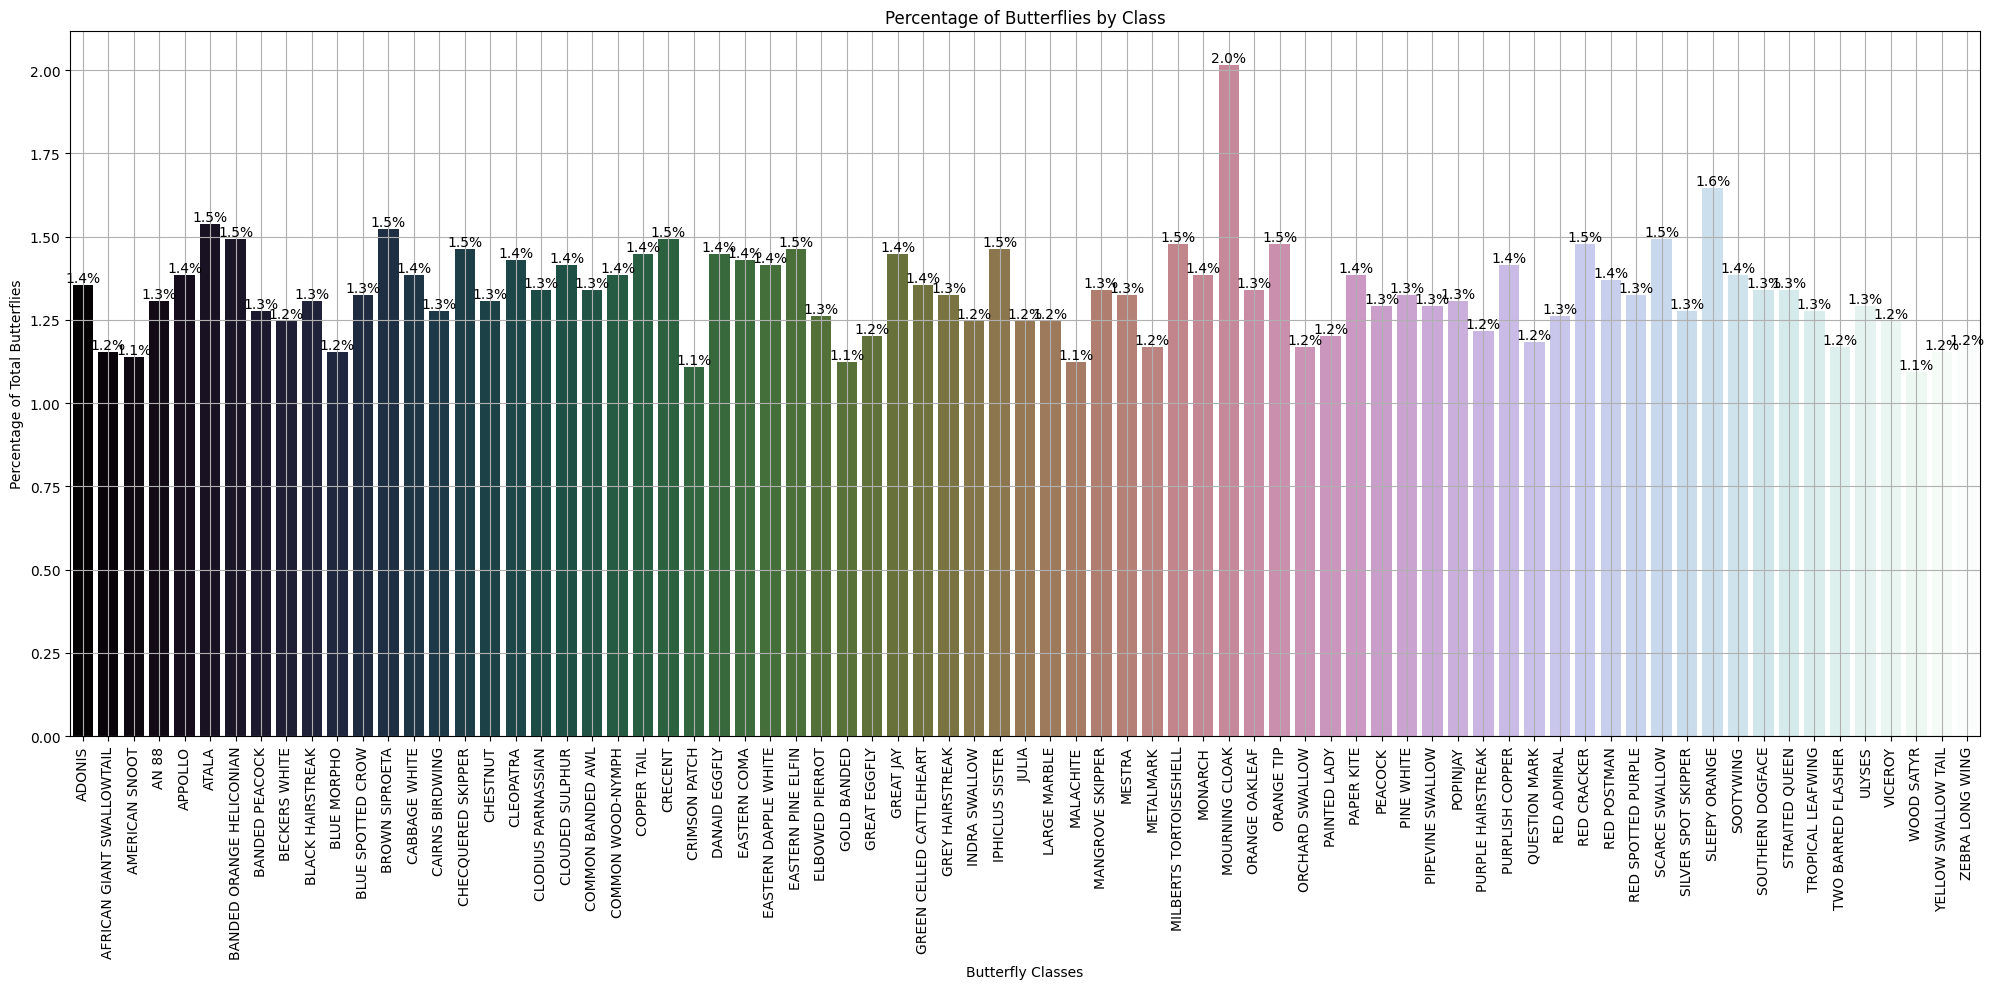

In [ ]:
# 5. Bar Chart with Percentage Labels
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=class_counts.index, y=class_counts.values / class_counts.sum() * 100, palette='cubehelix')
plt.title('Percentage of Butterflies by Class')
plt.xlabel('Butterfly Classes')
plt.ylabel('Percentage of Total Butterflies')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

# Add labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:green; overflow:hidden"><b>Building the Model</b></div>


- For classifying butterfly images, we will create a Neural Network right now. This model will be trained with training data set, and tested with validation data set.

In [ ]:
# Import required libraries
from tensorflow.keras import layers, models

# Build a neural network model
model_NN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(75, activation='softmax')
])

# Compile the model
model_NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,072,139 (72.75 MB)

 Trainable params: 19,072,139 (72.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the NN model with 40 epochs and get the highest accuracy value
history = model_NN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 66s 363ms/step - accuracy: 0.0433 - loss: 4.2167 - val_accuracy: 0.1648 - val_loss: 3.2072
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1562 - loss: 3.1679 - val_accuracy: 0.1500 - val_loss: 3.0677
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.1918 - loss: 3.0924 - val_accuracy: 0.3359 - val_loss: 2.4502
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.2188 - loss: 2.8199 - val_accuracy: 0.1500 - val_loss: 2.7860
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 211ms/step - accuracy: 0.3072 - loss: 2.5004 - val_accuracy: 0.3875 - val_loss: 2.3377
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.4375 - loss: 1.9826 - val_accuracy: 0.3000 - val_loss: 2.6182
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 213ms/step - accuracy: 0.3948 - loss: 2.1461 - val_accuracy: 0.4609 - val_loss: 2.0073
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.6562 - loss: 1.4219 

## Visualizing the Training Results

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(20, 10))

# First plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Second plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:
# Evaluate the model performance on validation data
val_loss, val_acc = model_NN.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc}')
print(f'Validation Loss: {val_loss}')

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:black; margin:0; font-size:150%; font-family:Pacifico; background-color:green; overflow:hidden"><b>MobileNetV2</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained MobileNetV2 Model (Without Top Layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Modify based on dataset imbalance

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 20 Layers of MobileNetV2
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#!pip install vit-keras
#!pip install keras-cv

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:black; margin:0; font-size:150%; font-family:Pacifico; background-color:orange; overflow:hidden"><b>VGG16</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained VGG16 Model (Without Top Layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {i: 1.0 for i in range(75)}  # Modify based on dataset imbalance if needed

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 5 Layers of VGG16
base_model.trainable = True
for layer in base_model.layers[:-5]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:black; margin:0; font-size:150%; font-family:Pacifico; background-color:teal; overflow:hidden"><b>ResNet-50</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained ResNet-50 Model (Without Top Layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {i: 1.0 for i in range(75)}  # Modify based on dataset imbalance if needed

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 5 Layers of ResNet-50
base_model.trainable = True
for layer in base_model.layers[:-5]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:darkblue; overflow:hidden"><b>EfficientNetB0</b></div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained EfficientNetB0 Model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {i: 1.0 for i in range(75)}  # Modify based on dataset imbalance if needed

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 5 Layers of EfficientNetB0
base_model.trainable = True
for layer in base_model.layers[:-5]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:black; margin:0; font-size:150%; font-family:Pacifico; background-color:salmon; overflow:hidden"><b>Pytorch and Vision transformer</b></div>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from transformers import ViTForImageClassification, ViTImageProcessor
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Set Device (Use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load dataset
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

In [ ]:
# Check if 'label' column exists
if 'label' not in df_train.columns or 'filename' not in df_train.columns:
    raise KeyError("⚠️ Missing 'label' or 'filename' column in training data CSV!")

if 'filename' not in df_test.columns:
    raise KeyError("⚠️ Missing 'filename' column in test data CSV!")

In [ ]:
# Encode labels as integers
label_encoder = LabelEncoder()
df_train["encoded_label"] = label_encoder.fit_transform(df_train["label"])

# Split dataset into train & validation
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

In [ ]:
# Image Preprocessing (Using Hugging Face ViT Image Processor)
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

In [ ]:
# Custom PyTorch Dataset with Fixed Label Encoding
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = int(self.dataframe.iloc[idx, 2])

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std),
])

In [ ]:
# Create PyTorch Datasets & DataLoaders
train_dataset = ButterflyDataset(train_data, image_dir, transform=transform)
val_dataset = ButterflyDataset(val_data, image_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Load Pretrained Vision Transformer Model Without `num_labels`
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
model.to(device)

# Modify Classifier for 75 Classes
model.classifier = nn.Linear(model.config.hidden_size, len(label_encoder.classes_))
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

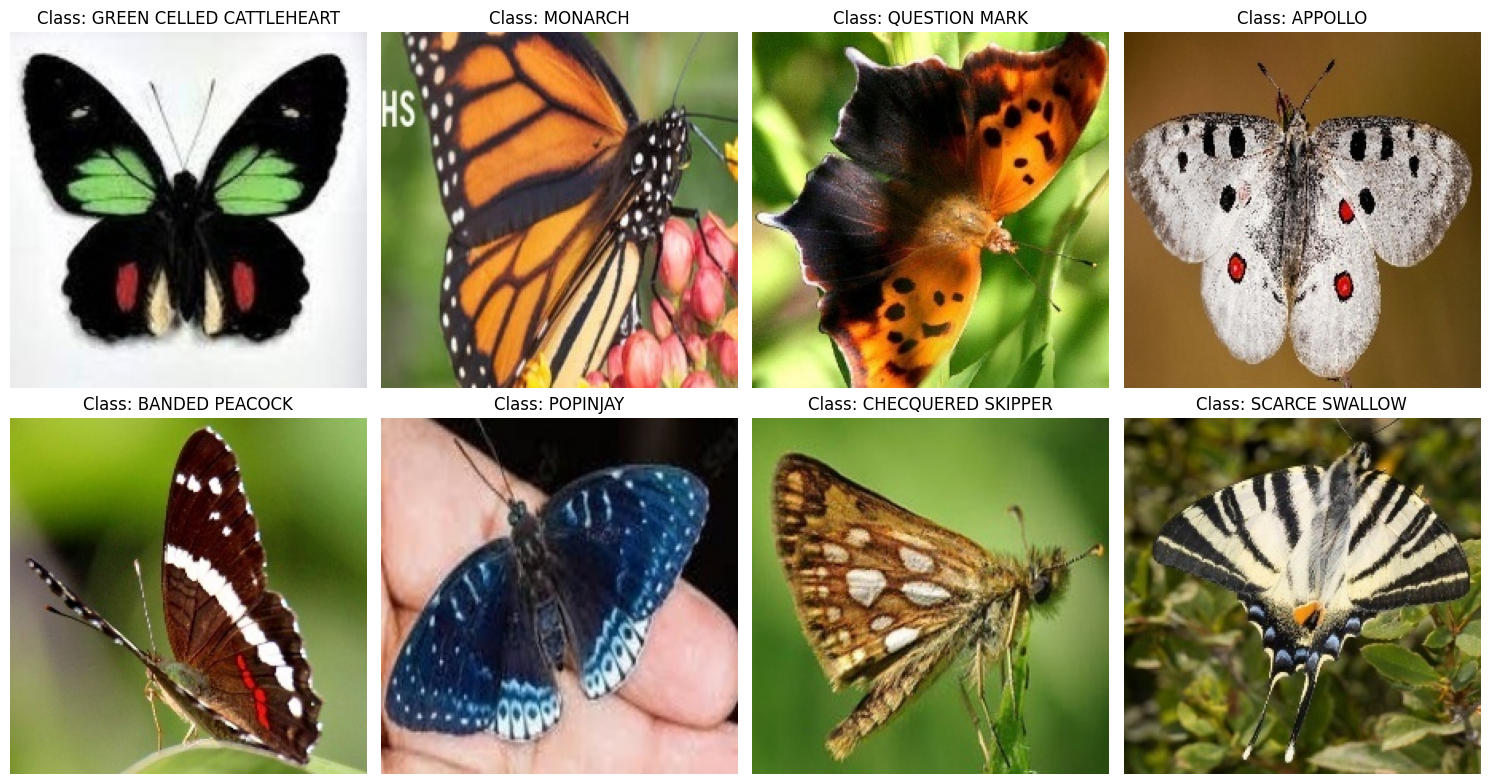

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Create a grid for displaying butterflies
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Randomly sample 8 images from the dataset
sample_images = df_train.sample(8, random_state=42)

# Display images
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_path = os.path.join(image_dir, row['filename'])

    # Load and preprocess image
    image = load_img(image_path, target_size=(224, 224))  # Resize to ViT input size
    image_array = img_to_array(image) / 255.0  # Normalize

    # Get the correct subplot
    ax = axes[i // 4, i % 4]

    ax.imshow(image_array)
    ax.set_title(f"Class: {row['label']}", fontsize=12)
    ax.axis('off')

# Show images
plt.tight_layout()
plt.show()

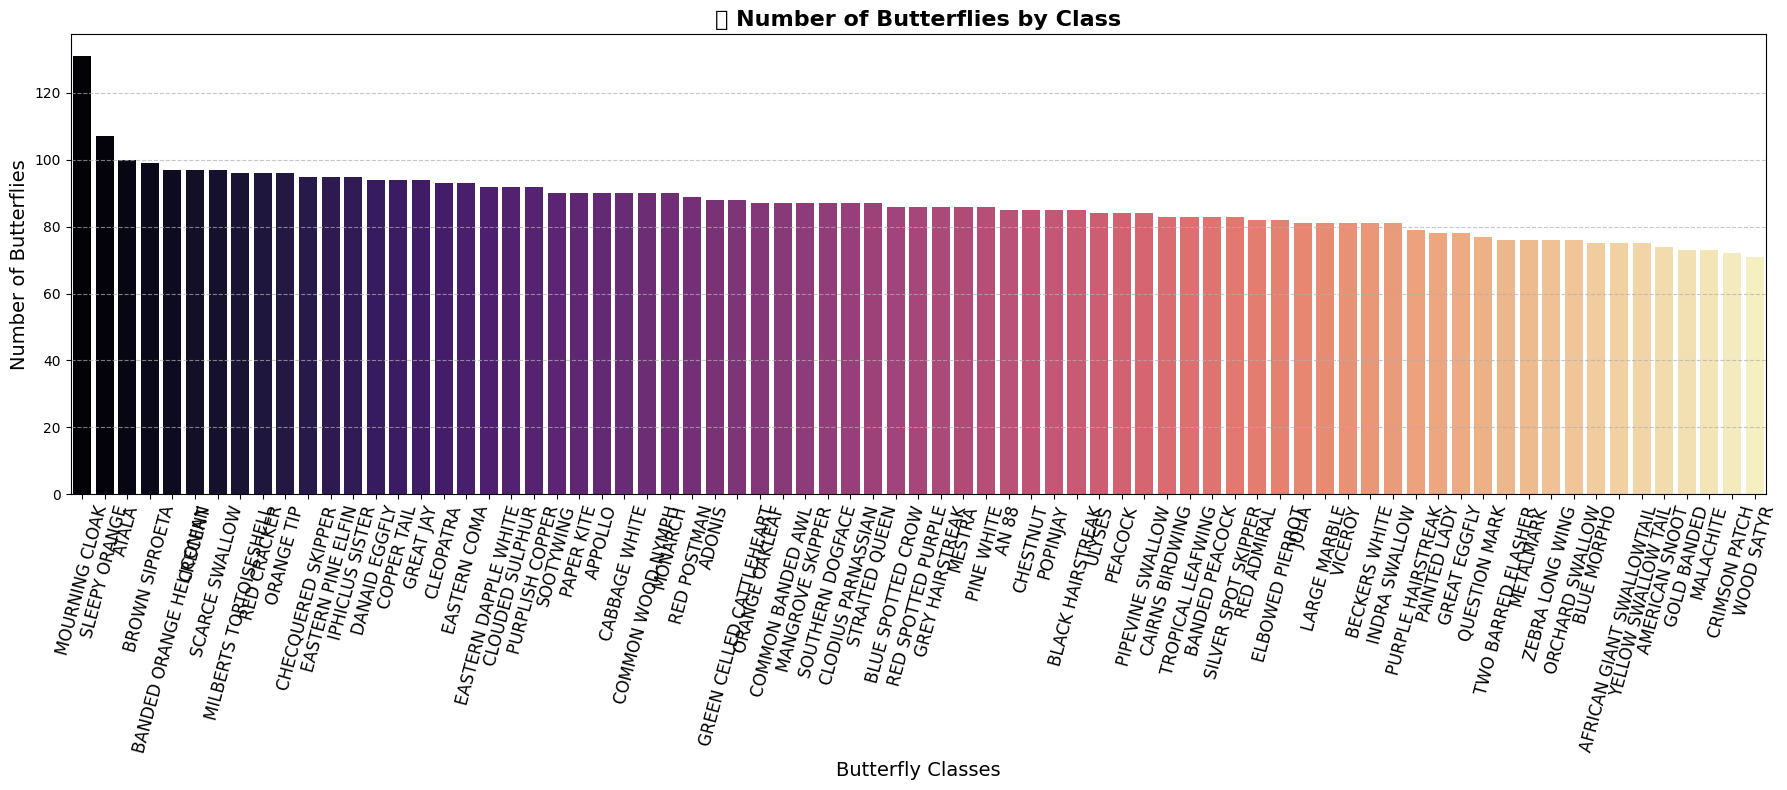

In [ ]:
# Count butterflies per class
class_counts = df_train['label'].value_counts().sort_values(ascending=False)

# Create figure
fig = plt.figure(figsize=(18, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='magma')

# Titles and labels
plt.title('🦋 Number of Butterflies by Class', fontsize=16, fontweight='bold')
plt.xlabel('Butterfly Classes', fontsize=14)
plt.ylabel('Number of Butterflies', fontsize=14)
plt.xticks(rotation=75, fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
for class_name in class_counts.index:
    print(class_name)

MOURNING CLOAK
SLEEPY ORANGE
ATALA
BROWN SIPROETA
BANDED ORANGE HELICONIAN
CRECENT
SCARCE SWALLOW
MILBERTS TORTOISESHELL
RED CRACKER
ORANGE TIP
CHECQUERED SKIPPER
EASTERN PINE ELFIN
IPHICLUS SISTER
DANAID EGGFLY
COPPER TAIL
GREAT JAY
CLEOPATRA
EASTERN COMA
EASTERN DAPPLE WHITE
CLOUDED SULPHUR
PURPLISH COPPER
SOOTYWING
PAPER KITE
APPOLLO
CABBAGE WHITE
COMMON WOOD-NYMPH
MONARCH
RED POSTMAN
ADONIS
GREEN CELLED CATTLEHEART
ORANGE OAKLEAF
COMMON BANDED AWL
MANGROVE SKIPPER
SOUTHERN DOGFACE
CLODIUS PARNASSIAN
STRAITED QUEEN
BLUE SPOTTED CROW
RED SPOTTED PURPLE
GREY HAIRSTREAK
MESTRA
PINE WHITE
AN 88
CHESTNUT
POPINJAY
BLACK HAIRSTREAK
ULYSES
PEACOCK
PIPEVINE SWALLOW
CAIRNS BIRDWING
TROPICAL LEAFWING
BANDED PEACOCK
SILVER SPOT SKIPPER
RED ADMIRAL
ELBOWED PIERROT
JULIA
LARGE MARBLE
VICEROY
BECKERS WHITE
INDRA SWALLOW
PURPLE HAIRSTREAK
PAINTED LADY
GREAT EGGFLY
QUESTION MARK
TWO BARRED FLASHER
METALMARK
ZEBRA LONG WING
ORCHARD SWALLOW
BLUE MORPHO
AFRICAN GIANT SWALLOWTAIL
YELLOW SWALLOW TAIL
AME

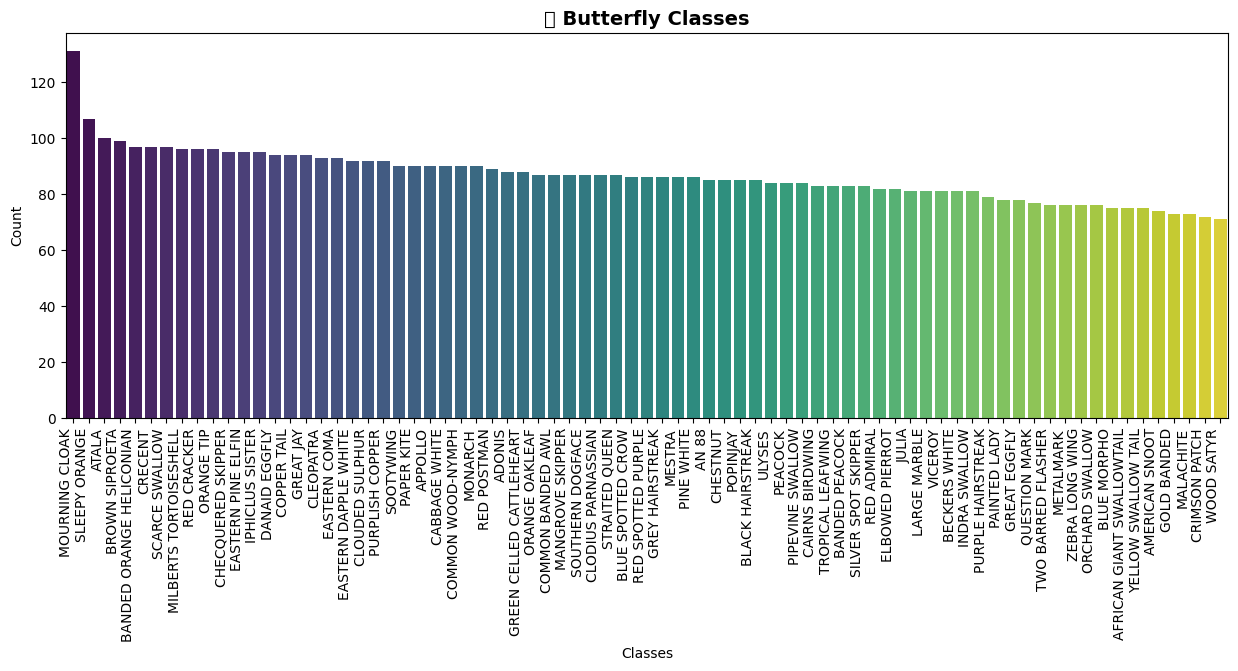

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xticks(rotation=90, fontsize=10, ha="right")  # নাম গুলো ঘুরিয়ে দেখানো
plt.title("🦋 Butterfly Classes", fontsize=14, fontweight='bold')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
# Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30):
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for batch in train_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation Phase
        model.eval()
        val_loss = 0.0
        correct, total = 0, 0

        with torch.no_grad():
            for batch in val_loader:
                images, labels = batch
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                loss = criterion(outputs, labels)

                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        val_acc = correct / total

        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    return train_losses, val_losses

In [ ]:
# Train the Model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30)

Epoch [1/30] | Train Loss: 1.3179 | Val Loss: 0.3372 | Val Acc: 0.9208
Epoch [2/30] | Train Loss: 0.1639 | Val Loss: 0.2759 | Val Acc: 0.9323
Epoch [3/30] | Train Loss: 0.0536 | Val Loss: 0.2496 | Val Acc: 0.9338
Epoch [4/30] | Train Loss: 0.0260 | Val Loss: 0.2407 | Val Acc: 0.9454
Epoch [5/30] | Train Loss: 0.0102 | Val Loss: 0.2194 | Val Acc: 0.9500
Epoch [6/30] | Train Loss: 0.0062 | Val Loss: 0.2350 | Val Acc: 0.9492
Epoch [7/30] | Train Loss: 0.0052 | Val Loss: 0.2298 | Val Acc: 0.9477
Epoch [8/30] | Train Loss: 0.0024 | Val Loss: 0.2316 | Val Acc: 0.9492
Epoch [9/30] | Train Loss: 0.0018 | Val Loss: 0.2341 | Val Acc: 0.9508
Epoch [10/30] | Train Loss: 0.0015 | Val Loss: 0.2364 | Val Acc: 0.9500
Epoch [11/30] | Train Loss: 0.0012 | Val Loss: 0.2394 | Val Acc: 0.9515
Epoch [12/30] | Train Loss: 0.0010 | Val Loss: 0.2418 | Val Acc: 0.9515
Epoch [13/30] | Train Loss: 0.0009 | Val Loss: 0.2446 | Val Acc: 0.9515
Epoch [14/30] | Train Loss: 0.0007 | Val Loss: 0.2472 | Val Acc: 0.9508
E

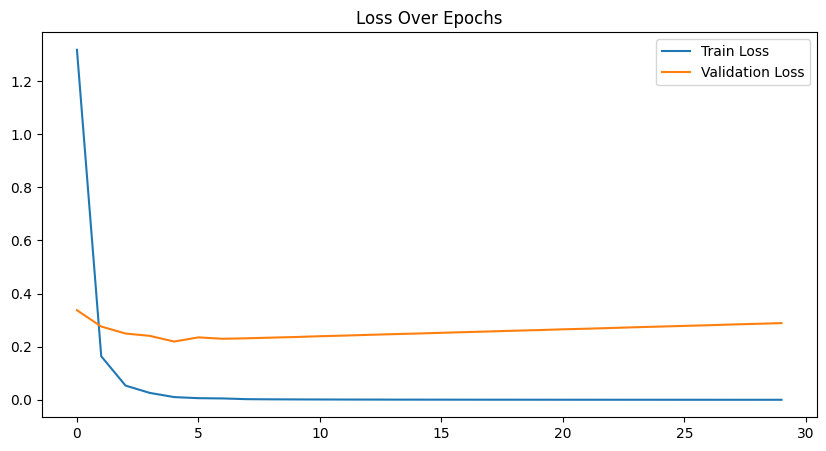

In [ ]:
# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

In [ ]:
# Prepare Test Data
class TestDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
test_dataset = TestDataset(df_test, image_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Predict on Test Images
model.eval()
predictions = []

with torch.no_grad():
    for images in test_loader:
        images = images.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Decode Predictions
decoded_labels = label_encoder.inverse_transform(predictions)

In [ ]:
# Save Predictions
df_test["predicted_label"] = decoded_labels
df_test.to_csv("butterfly_model.csv", index=False)
print("Predictions saved to pytorch butterfly_model.csv")

Predictions saved to pytorch butterfly_model.csv


In [ ]:
import torch

# Save the trained model
torch.save(model.state_dict(), "butterfly_model.pth")
print("Model saved as butterfly_model.pth")

Model saved as butterfly_model.pth


In [ ]:
import torch

# Load the saved model
model.load_state_dict(torch.load("butterfly_model.pth"))
model.eval()
print("Model loaded successfully")

Model loaded successfully


In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Custom Prediction Function with Image Display
def predict_and_show_image(image_path, model, processor, label_encoder):
    """
    Predict the class of a given butterfly image and display the image with prediction results.

    Args:
        image_path (str): Path to the image file.
        model (torch.nn.Module): Trained Vision Transformer model.
        processor (ViTImageProcessor): Image processor for preprocessing.
        label_encoder (LabelEncoder): Label encoder for decoding predictions.
    """
    model.eval()  # Set model to evaluation mode

    # Load and process image
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs).logits
        probs = F.softmax(outputs, dim=1)
        top_prob, top_class = torch.max(probs, 1)

    # Decode label
    predicted_label = label_encoder.inverse_transform([top_class.cpu().item()])[0]
    confidence_score = top_prob.cpu().item()

    # Get top-3 predictions
    top3_probs, top3_classes = torch.topk(probs, 3)
    top3_labels = [label_encoder.inverse_transform([cls.cpu().item()])[0] for cls in top3_classes[0]]
    top3_scores = top3_probs[0].cpu().tolist()

    # Print results
    print(f"🦋 Predicted Class: {predicted_label}")
    print(f"🔍 Confidence Score: {confidence_score:.4f}")
    print(f"🏆 Top 3 Predictions:")
    for i in range(3):
        print(f"  {i+1}. {top3_labels[i]} ({top3_scores[i]:.4f})")

    # Show image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"🦋 Predicted: {predicted_label}\n🔍 Confidence: {confidence_score:.4f}", fontsize=12, fontweight='bold', color='darkblue')
    plt.show()


🦋 Predicted Class: RED SPOTTED PURPLE
🔍 Confidence Score: 0.9999
🏆 Top 3 Predictions:
  1. RED SPOTTED PURPLE (0.9999)
  2. PIPEVINE SWALLOW (0.0000)
  3. BLUE MORPHO (0.0000)


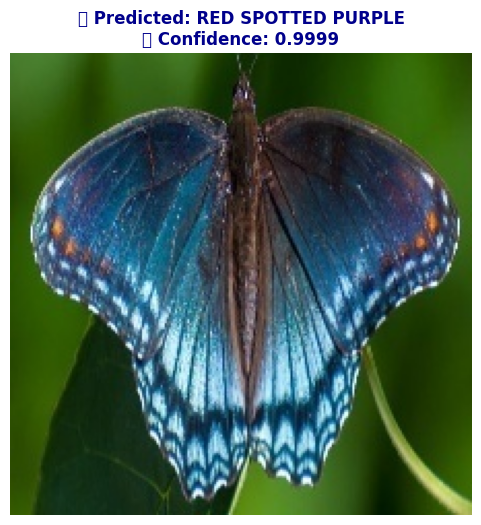

In [ ]:
# Example usage:
image_path = "/kaggle/input/butterfly-image-classification/test/Image_1001.jpg"
predict_and_show_image(image_path, model, processor, label_encoder)

🦋 Predicted Class: RED ADMIRAL
🔍 Confidence Score: 0.9998
🏆 Top 3 Predictions:
  1. RED ADMIRAL (0.9998)
  2. MILBERTS TORTOISESHELL (0.0001)
  3. PAINTED LADY (0.0000)


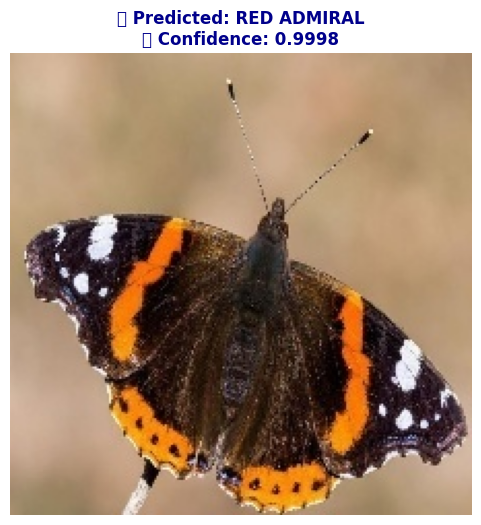

In [ ]:
# Example usage:
image_path = "/kaggle/input/butterfly-image-classification/test/Image_1023.jpg"
predict_and_show_image(image_path, model, processor, label_encoder)

🦋 Predicted Class: EASTERN COMA
🔍 Confidence Score: 0.9925
🏆 Top 3 Predictions:
  1. EASTERN COMA (0.9925)
  2. MILBERTS TORTOISESHELL (0.0032)
  3. PAINTED LADY (0.0013)


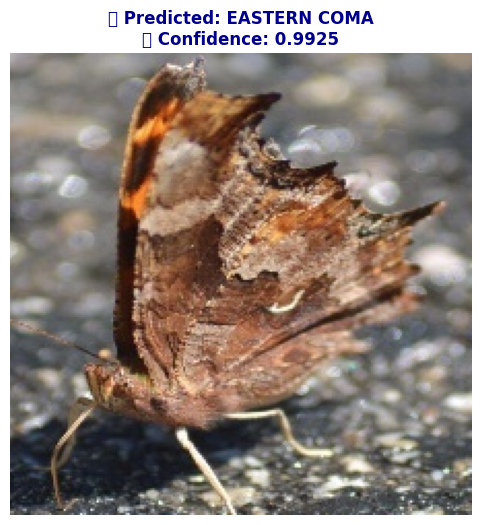

In [ ]:
# Example usage:
image_path = "/kaggle/input/butterfly-image-classification/test/Image_102.jpg"
predict_and_show_image(image_path, model, processor, label_encoder)

🦋 Predicted Class: COPPER TAIL
🔍 Confidence Score: 0.9996
🏆 Top 3 Predictions:
  1. COPPER TAIL (0.9996)
  2. BLACK HAIRSTREAK (0.0001)
  3. CRECENT (0.0000)


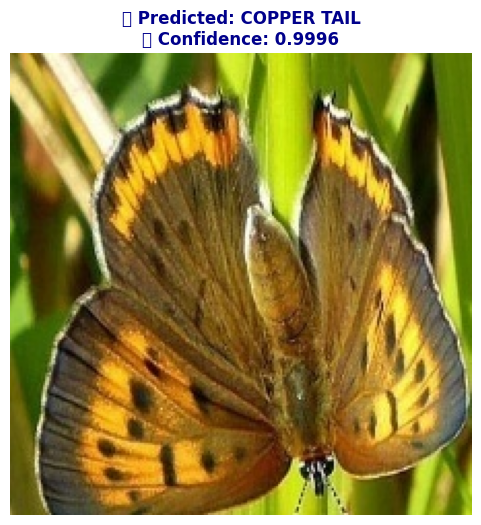

In [ ]:
# Example usage:
image_path = "/kaggle/input/butterfly-image-classification/test/Image_1031.jpg"
predict_and_show_image(image_path, model, processor, label_encoder)

🦋 Predicted Class: AMERICAN SNOOT
🔍 Confidence Score: 0.9999
🏆 Top 3 Predictions:
  1. AMERICAN SNOOT (0.9999)
  2. PAINTED LADY (0.0000)
  3. ORCHARD SWALLOW (0.0000)


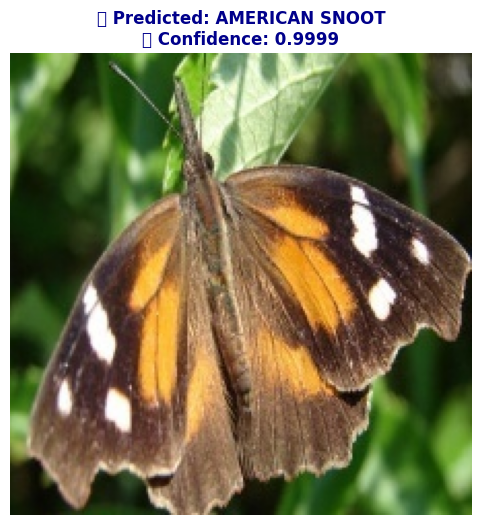

In [ ]:
# Example usage:
image_path = "/kaggle/input/butterfly-image-classification/test/Image_1041.jpg"
predict_and_show_image(image_path, model, processor, label_encoder)

📊 Classification Report:
                           precision    recall  f1-score   support

                   ADONIS       0.94      1.00      0.97        15
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00        19
           AMERICAN SNOOT       0.92      1.00      0.96        12
                    AN 88       1.00      1.00      1.00        10
                  APPOLLO       1.00      0.95      0.97        20
                    ATALA       1.00      1.00      1.00        17
 BANDED ORANGE HELICONIAN       1.00      0.89      0.94        19
           BANDED PEACOCK       0.93      0.93      0.93        15
            BECKERS WHITE       0.94      0.94      0.94        18
         BLACK HAIRSTREAK       0.94      0.89      0.91        18
              BLUE MORPHO       1.00      0.94      0.97        16
        BLUE SPOTTED CROW       0.92      1.00      0.96        12
           BROWN SIPROETA       0.93      1.00      0.96        26
            CABBAGE WHITE       0.90

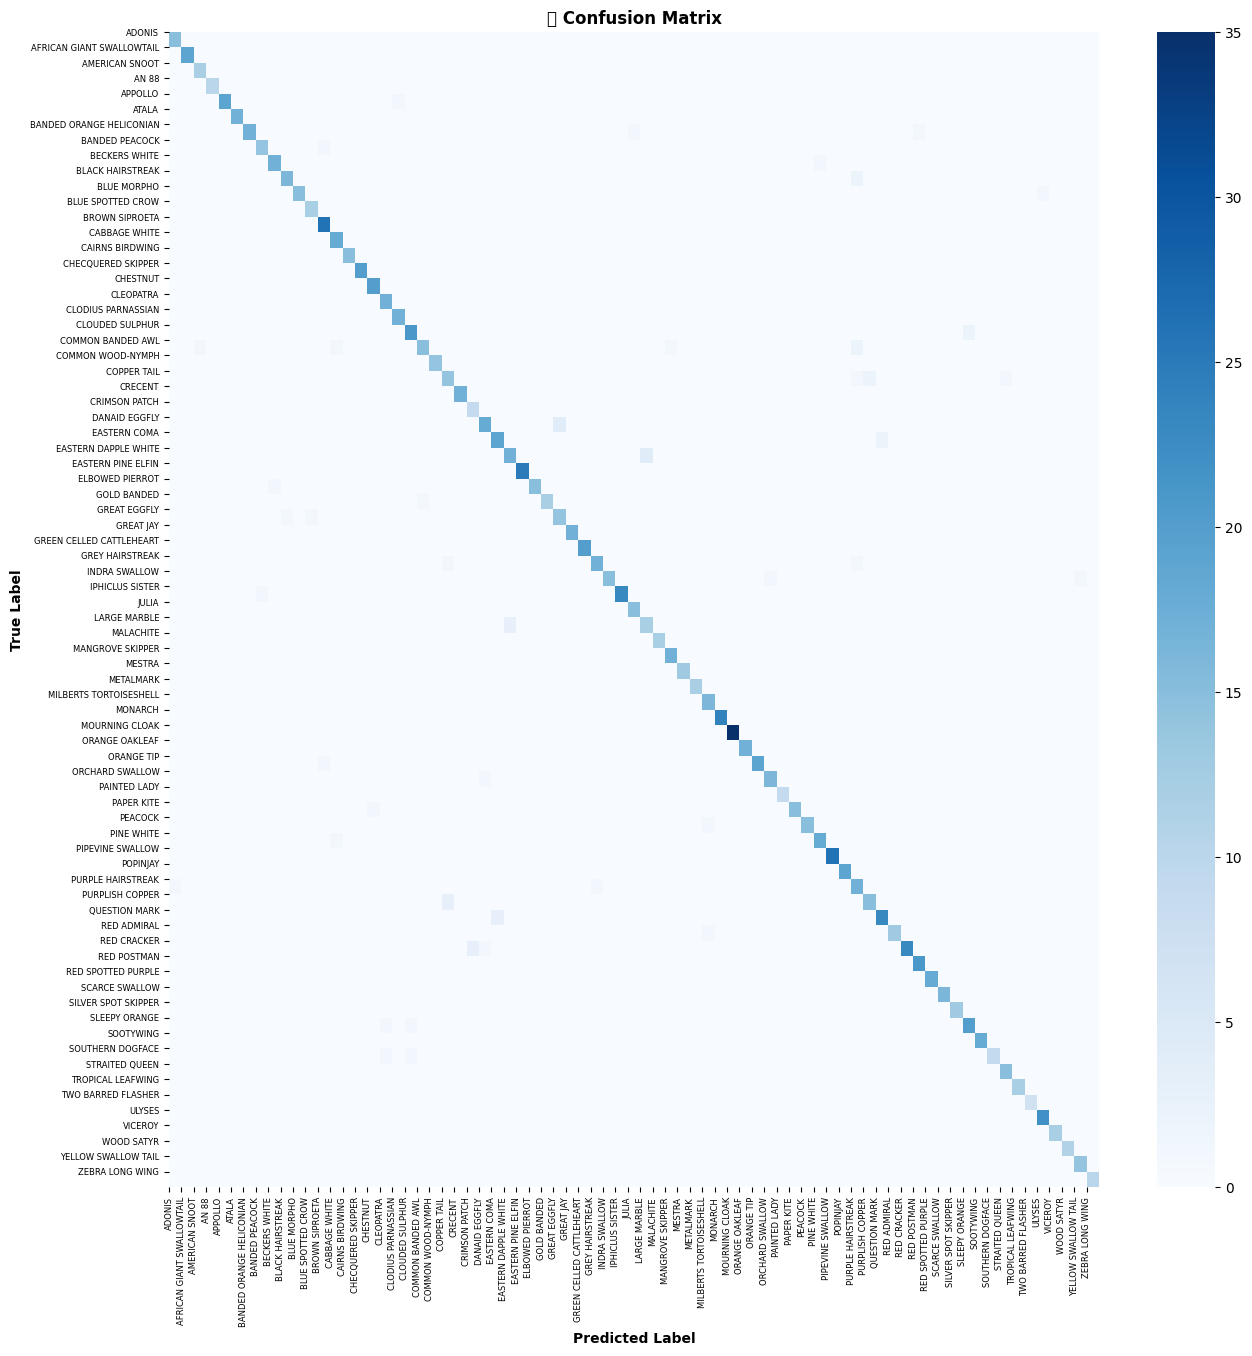

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Function to Evaluate Model on Validation/Test Set
def evaluate_model(model, dataloader, label_encoder):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Decode labels
    all_preds = label_encoder.inverse_transform(all_preds)
    all_labels = label_encoder.inverse_transform(all_labels)

    # Print Classification Report
    print("📊 Classification Report:")
    print(classification_report(all_labels, all_preds))

    # Generate Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Fixing Label Overlapping Problem
    fig, ax = plt.subplots(figsize=(15, 15))

    # Heatmap with better scaling
    sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=False, yticklabels=False, ax=ax)

    # Set Labels Manually
    ax.set_xticks(np.arange(len(label_encoder.classes_)))
    ax.set_yticks(np.arange(len(label_encoder.classes_)))
    ax.set_xticklabels(label_encoder.classes_, rotation=90, fontsize=6)
    ax.set_yticklabels(label_encoder.classes_, fontsize=6)

    plt.xlabel("Predicted Label", fontsize=10, fontweight='bold')
    plt.ylabel("True Label", fontsize=10, fontweight='bold')
    plt.title("🌀 Confusion Matrix", fontsize=12, fontweight='bold')

    plt.show()

# Run evaluation on validation set
evaluate_model(model, val_loader, label_encoder)